# Elementary Cellular Automata [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/maxencefaldor/cax/blob/main/examples/10_elementary_ca.ipynb)

## Installation

You will need Python 3.10 or later, and a working JAX installation. For example, you can install JAX with:

In [ ]:
%pip install -U "jax[cuda12]"

Then, install CAX from PyPi:

In [ ]:
%pip install -U "cax[examples]"

## Import

In [1]:
import jax.numpy as jnp
import mediapy
from flax import nnx

from cax.systems.elementary import ElementaryCA

## Configuration

In [2]:
seed = 42

spatial_dims = (1_024,)
wolfram_code = "01101110"  # Rule 110

num_steps = 512

rngs = nnx.Rngs(seed)

## Instantiate system

In [3]:
ca = ElementaryCA(rngs=rngs)

In [6]:
ca.update.update_wolfram_code_from_string(wolfram_code)

## Sample initial state

In [7]:
def sample_state():
	"""Sample a state with a single active cell."""
	state = jnp.zeros((*spatial_dims, 1))
	return state.at[spatial_dims[0] // 2].set(1.0)

## Run

In [ ]:
state_init = sample_state()
state_final, states = ca(state_init, num_steps=num_steps)

## Visualize

""

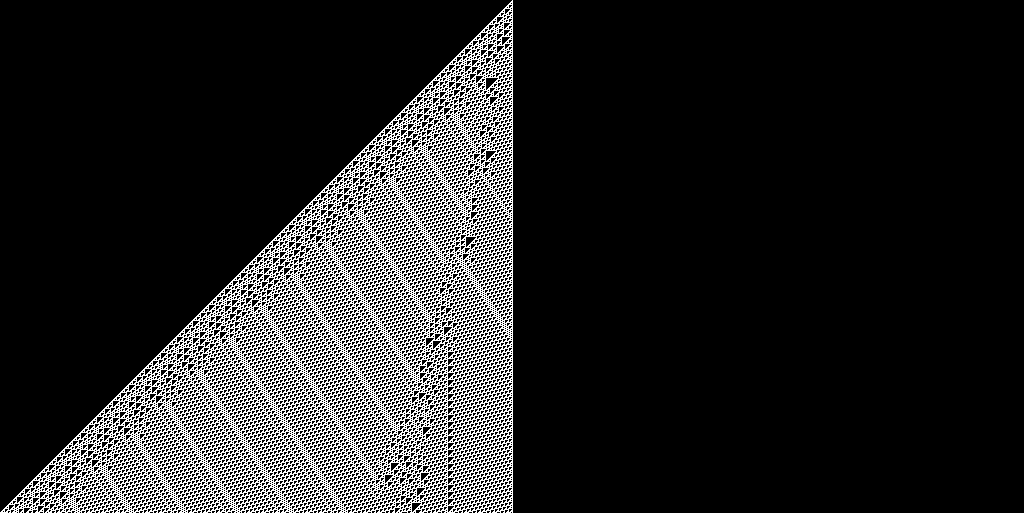

In [9]:
states = jnp.concatenate([state_init[None], states])
frame = ca.render(states)

mediapy.show_image(frame)